In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

In [47]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

text = "Sports encompass a wide range of physical activities that involve competition, skill, and teamwork. They serve not only as a source of entertainment but also promote physical fitness, mental well-being, and social interaction. Engaging in sports can foster discipline, resilience, and a sense of community among participants, while also providing opportunities for personal growth and development."
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
sentences = sent_tokenize(text)
words = word_tokenize(text)
words_split = text.split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
word_freq = Counter(filtered_words)

In [49]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text)
filtered_alpha_words = [word for word in alpha_words if word not in stop_words]
stemmed_words = [ps.stem(word) for word in filtered_alpha_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = ["Why Trump blinked, and why the US tariff assault now exclusively targets China", "Search operations resume in J&K’s Udhampur, Kishtwar", "Supreme Court to hear Waqf law challenge on April 16"]
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(texts)
tfidf_vectorizer = TfidfVectorizer()
tfidf_scores = tfidf_vectorizer.fit_transform(texts)

In [53]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "Artificial intelligence is rapidly reshaping our world, from automating mundane tasks to driving breakthroughs in complex fields. It's a technology built on algorithms and data, enabling machines to learn, adapt, and make decisions with increasing autonomy. While its potential is vast, offering solutions to global challenges, it also raises ethical considerations that demand careful navigation."
text2 = "Blockchain technology offers a revolutionary approach to data management, utilizing a decentralized and immutable ledger. Each block of data is cryptographically linked, ensuring transparency and security. This distributed system eliminates the need for intermediaries, fostering trust and efficiency across various industries. From cryptocurrencies to supply chain management, blockchain's potential to transform how we record and share information is only beginning to unfold."
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])

binary_matrix = (tfidf_matrix > 0).astype(int).toarray()
jaccard_sim = jaccard_score(binary_matrix[0], binary_matrix[1])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


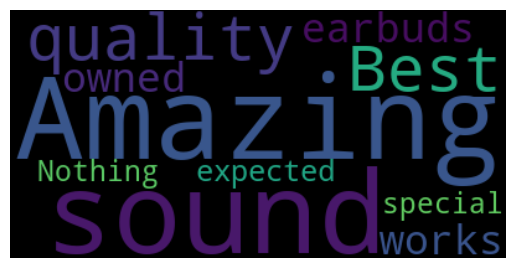

In [59]:
!pip install textblob
!pip install wordcloud
import nltk
nltk.download('punkt')

from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = ["Amazing sound quality! Best earbuds I've ever owned", "Terrible battery life. Do not recommend", "It works as expected. Nothing special"]
results = []
for review in reviews:
    blob = TextBlob(review)
    results.append((review, blob.sentiment.polarity, blob.sentiment.subjectivity))
df = pd.DataFrame(results, columns=['Review', 'Polarity', 'Subjectivity'])
positive_reviews = df[df['Polarity'] > 0]
wordcloud = WordCloud().generate(' '.join(positive_reviews['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [41]:
!pip install tensorflow

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


paragraph = "The hum of modern life often drowns out the quiet moments, yet within those silences, profound insights reside. Technology, with its constant barrage of notifications, both connects and isolates us, demanding a conscious effort to disconnect and reconnect with ourselves. Nature, a timeless balm, offers a counterpoint, reminding us of the cyclical rhythm of existence. The pursuit of knowledge, a lifelong journey, expands our horizons, challenging preconceived notions and fostering empathy. Kindness, a simple yet powerful act, ripples outwards, creating a chain reaction of positivity. In the grand tapestry of life, finding balance between action and stillness, connection and solitude, is the key to a fulfilling existence."


tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1
input_sequences = []


for line in paragraph.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)


max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')


X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)


model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X, y, epochs=100)


def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')


        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)


        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break


        seed_text += " " + output_word

    return seed_text


seed_word = "This"
new_text = generate_text(seed_word, 3, model, max_sequence_length)
print(new_text)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0060 - loss: 4.3940  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0704 - loss: 4.3701
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0798 - loss: 4.3227
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0579 - loss: 4.2277    
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0798 - loss: 4.2072
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0858 - loss: 4.1695
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0856 - loss: 4.1670
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0886 - loss: 4.1253
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0875 - loss: 4.0918
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0917 - loss: 4.0246
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0890 - loss: 3.9943
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.104